## 싸인 함수 회귀분석 (Sine Regression)

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


## 데이터 생성

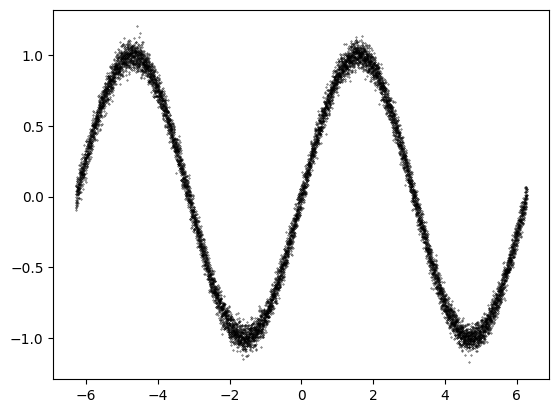

In [10]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

## 모델 정의

In [11]:
model = Sequential([
layers.Dense(64, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(16, activation='relu'),
layers.Dense(1)
])

## 모델 훈련

In [12]:
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

model.fit(inputs, outputs, epochs=20)

Epoch 1/20
  1/313 [..............................] - ETA: 1:35 - loss: 0.5461 - mae: 0.5461

2023-12-22 10:09:46.610495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.3330 - mae: 0.3330
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 0.1853 - mae: 0.1853
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 0.1467 - mae: 0.1467
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 0.1199 - mae: 0.1199
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 0.0949 - mae: 0.0949
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 0.0695 - mae: 0.0695
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 0.0564 - mae: 0.0564
Epoch 8/20
313/313 [==============================] - 2s 6ms/step - loss: 0.0544 - mae: 0.0544
Epoch 9/20
313/313 [==============================] - 2s 6ms/step - loss: 0.0545 - mae: 0.0545
Epoch 10/20
313/313 [==============================] - 2s 6ms/step - loss: 0.0515 - mae: 0.0515
Epoch 11/20
313/313 [==============================] - 2s 6m

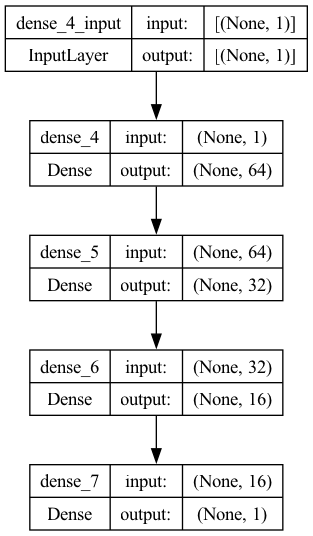

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [14]:
test_loss, test_mae = test_output_pred = model.evaluate(inputs, outputs, verbose=0)
print('Test MAE:', test_mae)

2023-12-22 10:10:26.412242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test MAE: 0.050281792879104614


## 테스트

 79/313 [======>.......................] - ETA: 0s

2023-12-22 10:10:27.439958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


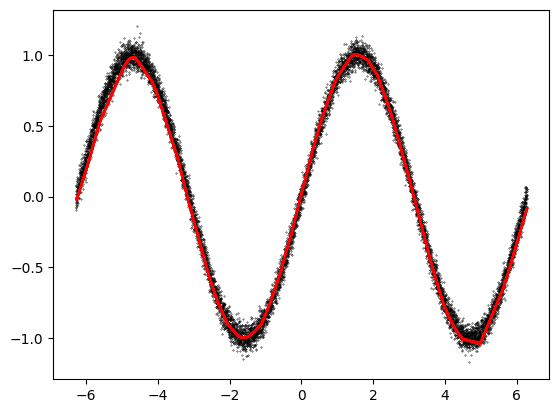

In [15]:
test_output_pred = model.predict(inputs)

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)